# Machine Learning Introduction: Handwritten Digits

### WIP - Unfinished!!!

In [1]:
import sklearn
from sklearn import (linear_model, datasets, metrics)
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import Isomap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

In [6]:
# .0 Initialization

digits = datasets.load_digits()

#print(digits.keys())

data = digits.data
image_label = digits.target
range = digits.target_names

def plot_embedding(X):
    _, ax = plt.subplots(figsize=(10,10))
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[digits.target == digit].T,
            marker=f"${digit}$",
            s=80,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )

    shown_images = np.array([[1.0, 1.0]])  # just something big

    length = np.shape(X)[0]

    for ii in range(length):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[ii] - shown_images) ** 2, 1)
        if np.min(dist) < 2e-2:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[ii]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[ii], cmap=plt.cm.gray_r), X[ii]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title('Isomap embedding')
    ax.axis("off")

Before embedding shape was: (1797, 64).
After embedding shape is: (1797, 2).


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

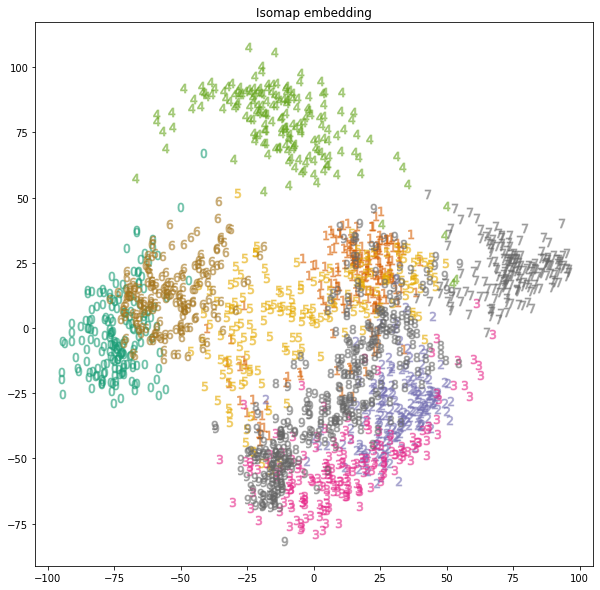

In [9]:
# .1 Dimensionality reduction with Isomap -> Unsupervised Learning

embedding = Isomap(n_neighbors=20, n_components=2)
new_data = embedding.fit_transform(data)
print('Before embedding shape was: {}.\nAfter embedding shape is: {}.'.format(data.shape, new_data.shape))

#length = np.shape(new_data)[0]

#plot_embedding(new_data)

_, ax = plt.subplots(figsize=(10,10))
#new_data = MinMaxScaler().fit_transform(new_data)

for digit in digits.target_names:
    ax.scatter(
        *new_data[digits.target == digit].T,
        marker=f"${digit}$",
        s=80,
        color=plt.cm.Dark2(digit),
        alpha=0.425,
        zorder=2,
    )

ax.set_title('Isomap embedding')
#plt.colorbar()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9415855354659249
Confusion matrix:
[[148   0   0   0   0   0   0   0   0   0]
 [  0 134   0   0   0   0   1   0   5   2]
 [  0   6 133   0   0   0   0   1   0   1]
 [  1   0   0 139   0   3   0   2   4   0]
 [  2   0   0   0 142   0   2   2   0   5]
 [  0   1   1   0   1 128   1   1   0  12]
 [  0   1   0   0   0   1 136   0   1   0]
 [  0   0   0   0   0   0   0 136   0   3]
 [  0   7   1   3   0   1   2   1 122   2]
 [  0   1   0   1   0   0   0   0   5 136]]


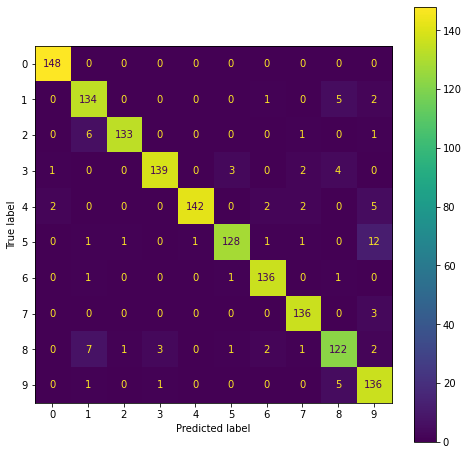

In [8]:
# .2 Classification with linear regression -> Supervised Learning

#Assigning a model
model = linear_model.LogisticRegression(solver='sag')

#Split data into training and test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    data, digits.target, test_size = 0.8)

#Train the model with the digits on the training subset
model.fit(X_train, y_train)

#Predict the value of the digit on the non-trained test subset
#Prediction comes from trained model!
y_predicted = model.predict(X_test)

#Accuracy score -> DIMENSIONALITY IS IMPORTANT!!
print(sklearn.metrics.accuracy_score(y_test, y_predicted))

fig, ax = plt.subplots(figsize=(8, 8))

conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

print(f"Confusion matrix:\n{conf_matrix}")

display = metrics.ConfusionMatrixDisplay(conf_matrix).plot(ax=ax)
plt.show()

#Alternatively 
'''
conf_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
conf_matrix.figure_.suptitle("Confusion Matrix")
''';